Diabetes data shape: (253680, 23)
Heart data shape: (4143, 32)

DIABETES DATASET - CLASSIFICATION

Classification on Diabetes dataset

------------------------------------------------------------
Model: Logistic Regression
------------------------------------------------------------
Cross-validation ROC AUC: 0.8227 (+/- 0.0026)

Test Set Performance:
  Accuracy:  0.8621
  Precision: 0.5162
  Recall:    0.1580
  F1-Score:  0.2420
  ROC AUC:   0.8192


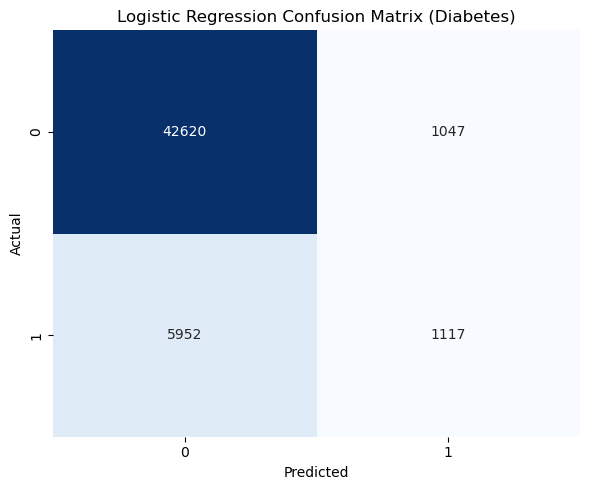

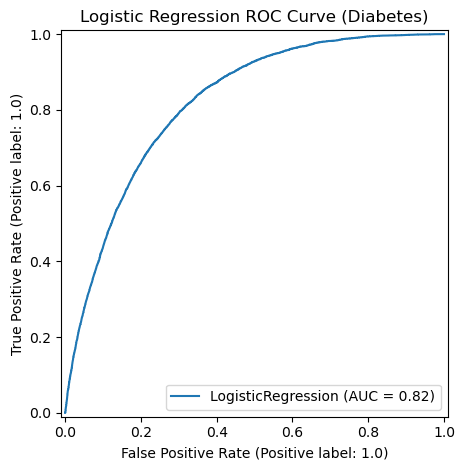


------------------------------------------------------------
Model: Random Forest
------------------------------------------------------------
Cross-validation ROC AUC: 0.7934 (+/- 0.0017)

Test Set Performance:
  Accuracy:  0.8571
  Precision: 0.4663
  Recall:    0.1773
  F1-Score:  0.2569
  ROC AUC:   0.7893


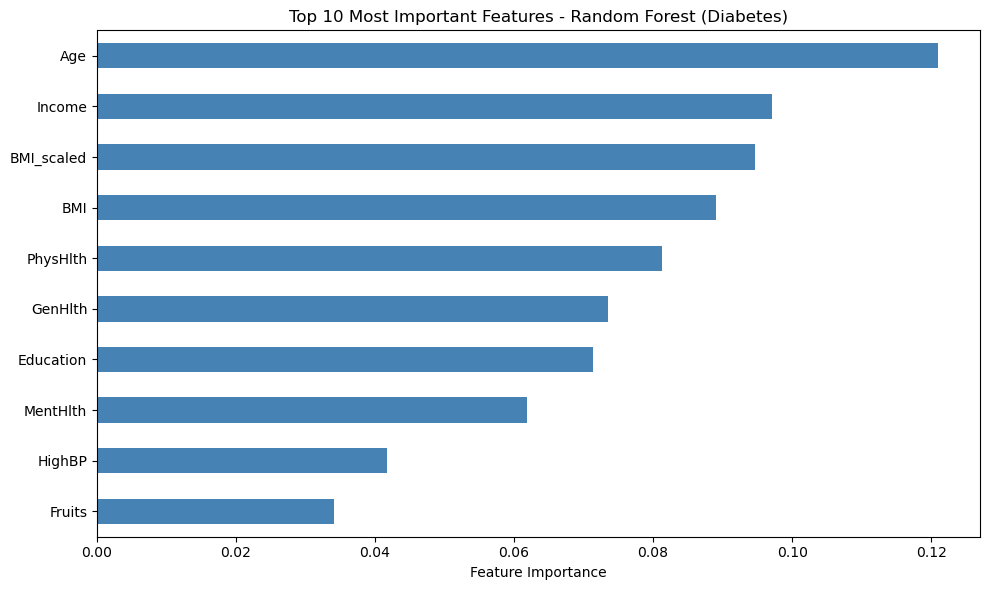

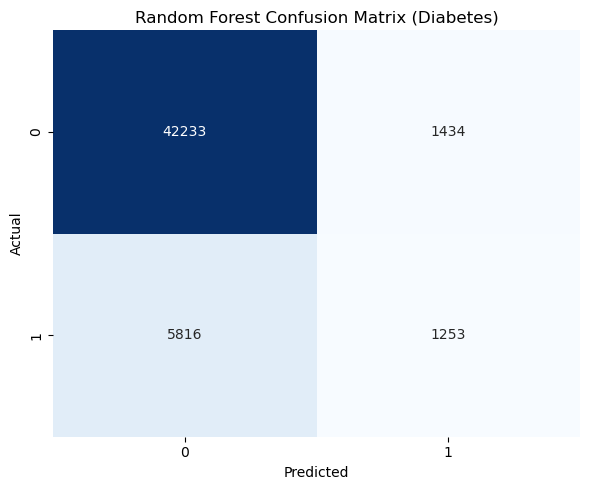

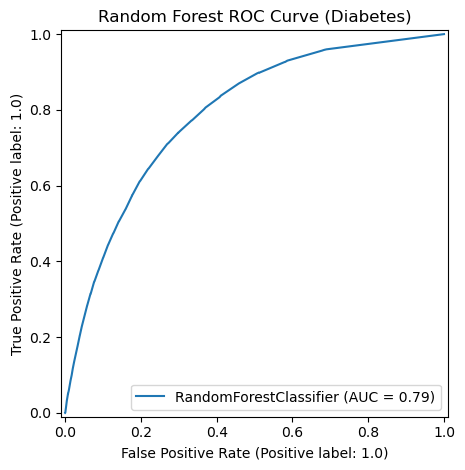


MODEL COMPARISON - Diabetes
              Model  CV_ROC_AUC  Test_ROC_AUC  Accuracy  Precision   Recall       F1
Logistic Regression    0.822724      0.819158  0.862051   0.516174 0.158014 0.241958
      Random Forest    0.793381      0.789282  0.857103   0.466319 0.177253 0.256868


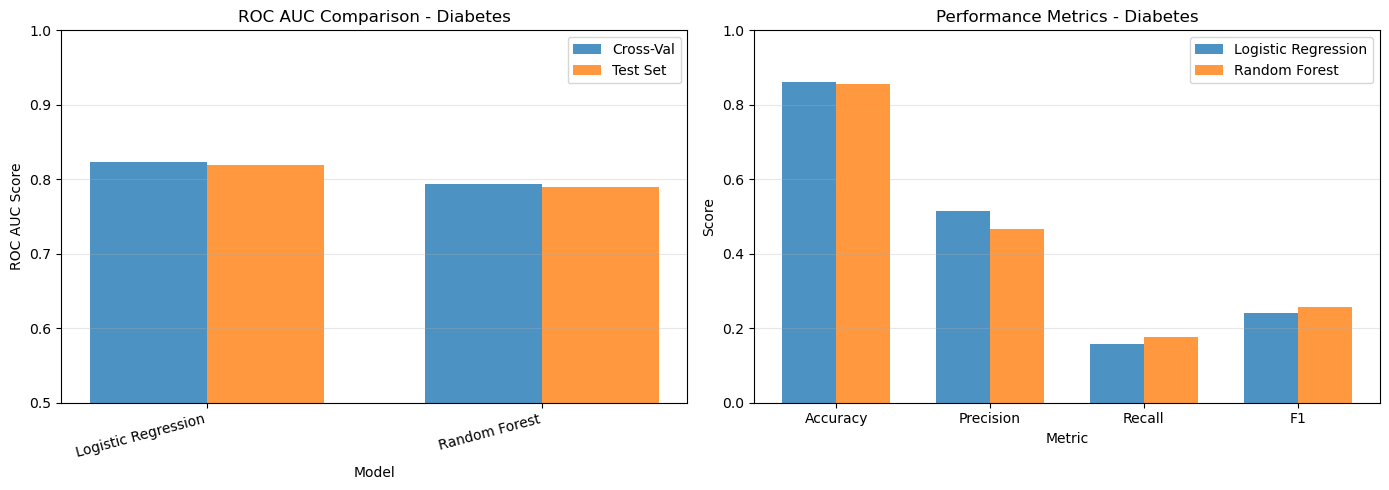


HEART DISEASE DATASET - CLASSIFICATION

Classification on Heart Disease dataset

------------------------------------------------------------
Model: Logistic Regression
------------------------------------------------------------
Cross-validation ROC AUC: 1.0000 (+/- 0.0000)

Test Set Performance:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC AUC:   1.0000


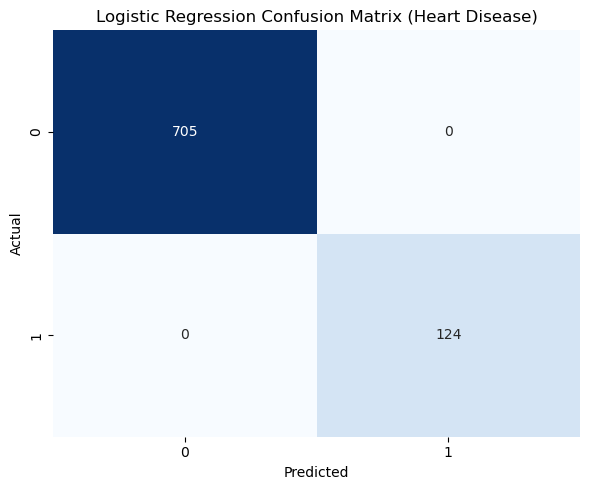

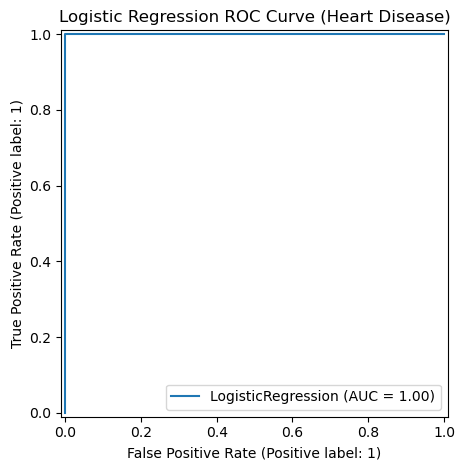


------------------------------------------------------------
Model: Random Forest
------------------------------------------------------------
Cross-validation ROC AUC: 1.0000 (+/- 0.0000)

Test Set Performance:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  ROC AUC:   1.0000


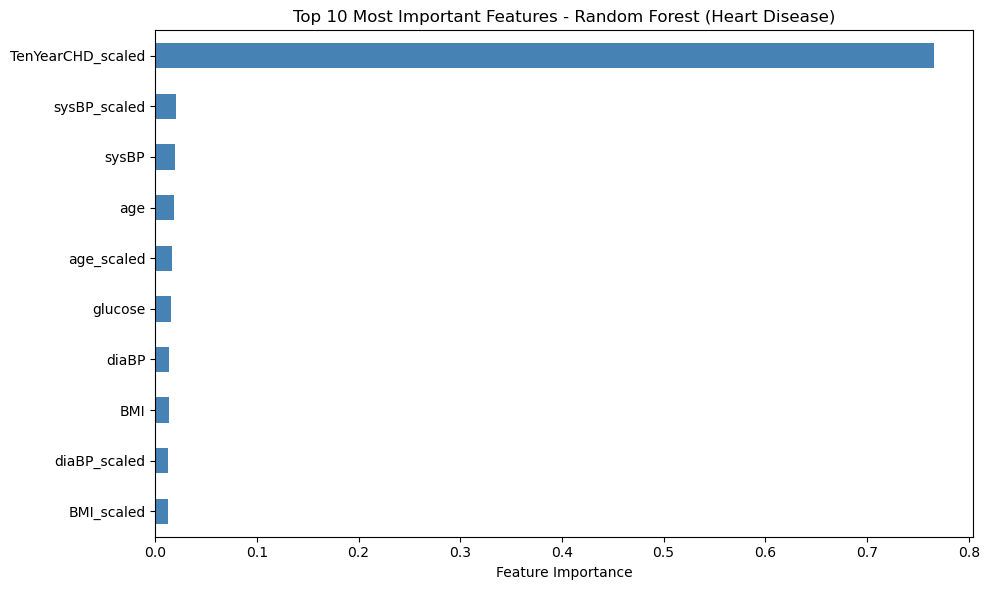

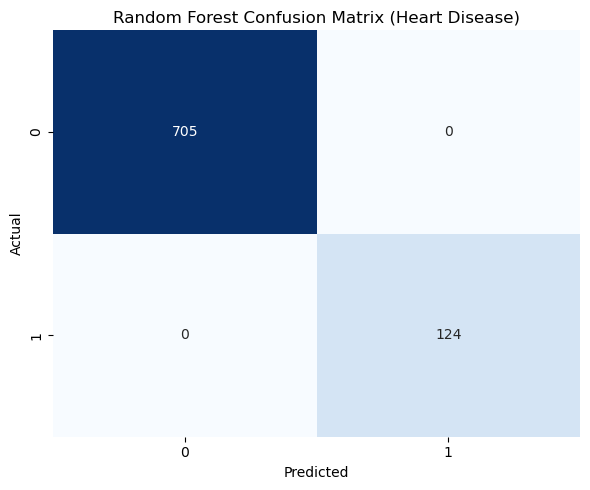

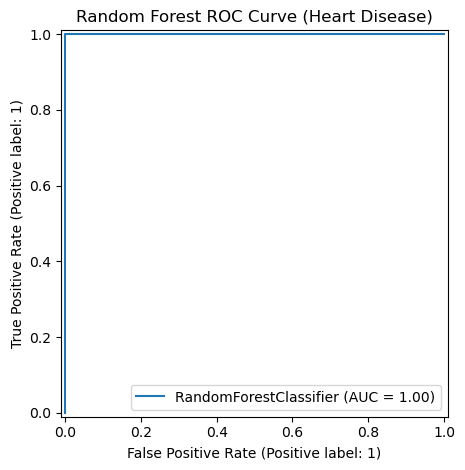


MODEL COMPARISON - Heart Disease
              Model  CV_ROC_AUC  Test_ROC_AUC  Accuracy  Precision  Recall  F1
Logistic Regression         1.0           1.0       1.0        1.0     1.0 1.0
      Random Forest         1.0           1.0       1.0        1.0     1.0 1.0


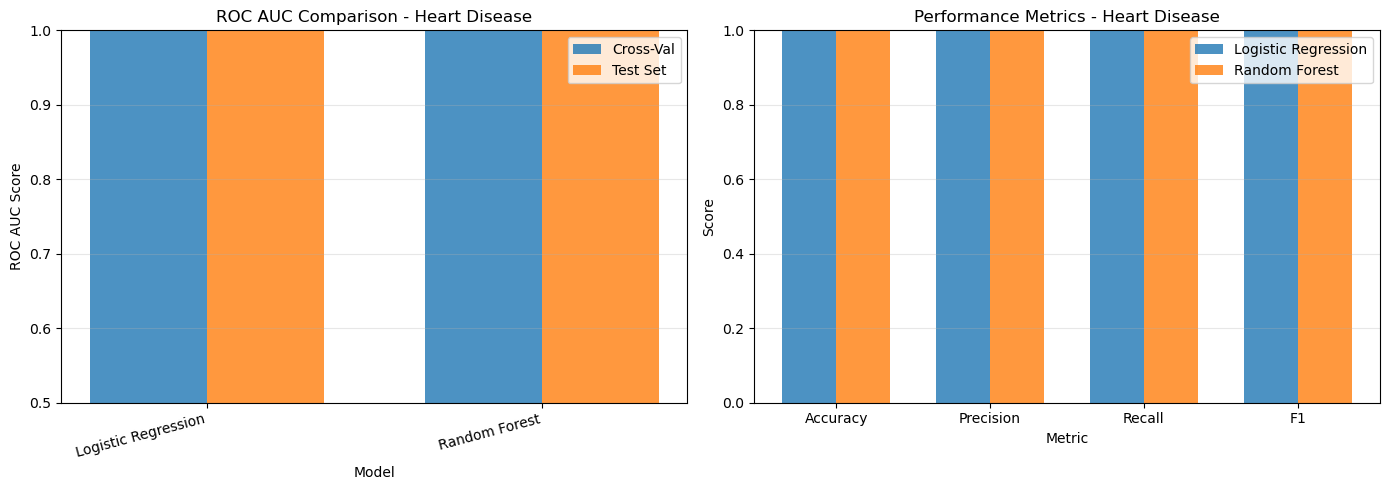


Hyperparameter Tuning - Random Forest (Diabetes)
Searching for best parameters...
Testing 36 combinations
Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# ==============================================
# 02_data_modelling.ipynb
# AI-Driven Predictive Analytics for Preventive Healthcare
# Sprint 3: Data Modelling
# ==============================================

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.utils import resample

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4" ## Added this for my computer to run the diffrent models else it would just either crash or take ages to complete..

# ----------------------------------------------
# LOAD CLEANED DATA
# ----------------------------------------------
diabetes_path = "../data/processed/cdc_diabetes_clean.csv"
heart_path = "../data/processed/heart_disease_clean.csv"

df_diabetes = pd.read_csv(diabetes_path)
df_heart = pd.read_csv(heart_path)

print("Diabetes data shape:", df_diabetes.shape)
print("Heart data shape:", df_heart.shape)

# ----------------------------------------------
# SUPERVISED LEARNING – CLASSIFICATION (IMPROVED)
# ----------------------------------------------
def run_classification_improved(df, target_col, dataset_name):
    print(f"\n{'='*60}")
    print(f"Classification on {dataset_name} dataset")
    print(f"{'='*60}")
    
    # Features (X) and Target (y)
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Models to compare
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=1)
    }
    
    results = []
    
    for name, model in models.items():
        print(f"\n{'-'*60}")
        print(f"Model: {name}")
        print(f"{'-'*60}")
        
        #1. CROSS-VALIDATION (Testing on multiple folds)
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
        print(f"Cross-validation ROC AUC: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Predict
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
        
        # Evaluation metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_proba)
        
        print(f"\nTest Set Performance:")
        print(f"  Accuracy:  {acc:.4f}")
        print(f"  Precision: {prec:.4f}")
        print(f"  Recall:    {rec:.4f}")
        print(f"  F1-Score:  {f1:.4f}")
        print(f"  ROC AUC:   {roc:.4f}")
        
        # Store results
        results.append({
            'Model': name,
            'CV_ROC_AUC': cv_scores.mean(),
            'Test_ROC_AUC': roc,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1
        })
        
        #2. FEATURE IMPORTANCE (for tree-based models)
        if hasattr(model, 'feature_importances_'):
            importances = pd.Series(model.feature_importances_, index=X.columns)
            top_features = importances.nlargest(10)
            
            plt.figure(figsize=(10, 6))
            top_features.sort_values().plot(kind='barh', color='steelblue')
            plt.title(f"Top 10 Most Important Features - {name} ({dataset_name})")
            plt.xlabel("Feature Importance")
            plt.tight_layout()
            plt.show()
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"{name} Confusion Matrix ({dataset_name})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()
        
        # ROC curve
        RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.title(f"{name} ROC Curve ({dataset_name})")
        plt.tight_layout()
        plt.show()
    
    # 3. MODEL COMPARISON
    results_df = pd.DataFrame(results)
    print(f"\n{'='*60}")
    print(f"MODEL COMPARISON - {dataset_name}")
    print(f"{'='*60}")
    print(results_df.to_string(index=False))
    
    # Visualize comparison
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # ROC AUC comparison
    x = np.arange(len(results_df))
    width = 0.35
    axes[0].bar(x - width/2, results_df['CV_ROC_AUC'], width, label='Cross-Val', alpha=0.8)
    axes[0].bar(x + width/2, results_df['Test_ROC_AUC'], width, label='Test Set', alpha=0.8)
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('ROC AUC Score')
    axes[0].set_title(f'ROC AUC Comparison - {dataset_name}')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(results_df['Model'], rotation=15, ha='right')
    axes[0].legend()
    axes[0].set_ylim([0.5, 1.0])
    axes[0].grid(axis='y', alpha=0.3)
    
    # All metrics comparison
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    x = np.arange(len(metrics))
    width = 0.35
    for i, row in results_df.iterrows():
        axes[1].bar(x + i*width, [row[m] for m in metrics], width, label=row['Model'], alpha=0.8)
    axes[1].set_xlabel('Metric')
    axes[1].set_ylabel('Score')
    axes[1].set_title(f'Performance Metrics - {dataset_name}')
    axes[1].set_xticks(x + width/2)
    axes[1].set_xticklabels(metrics)
    axes[1].legend()
    axes[1].set_ylim([0, 1.0])
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results_df


# 4. HYPERPARAMETER TUNING
def tune_random_forest(df, target_col, dataset_name):
    print(f"\n{'='*60}")
    print(f"Hyperparameter Tuning - Random Forest ({dataset_name})")
    print(f"{'='*60}")
    
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    print("Searching for best parameters...")
    print(f"Testing {np.prod([len(v) for v in param_grid.values()])} combinations")
    
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42, n_jobs=1),
        param_grid,
        cv=3,
        scoring='roc_auc',
        n_jobs=1,
        verbose=1
    )
    
    grid_search.fit(X_train_scaled, y_train)
    
    print(f"\nBest Parameters: {grid_search.best_params_}")
    print(f"Best CV ROC AUC: {grid_search.best_score_:.4f}")
    
    # Test best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:,1]
    
    print(f"\nTest Set Performance (Tuned Model):")
    print(f"  ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"  Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  F1-Score: {f1_score(y_test, y_pred):.4f}")
    
    return best_model


# ----------------------------------------------
# UNSUPERVISED LEARNING – CLUSTERING
# ----------------------------------------------
def run_clustering(df, dataset_name, n_clusters=3, max_sample=1000):
    print(f"\n{'='*60}")
    print(f"Clustering on {dataset_name} dataset")
    print(f"{'='*60}")
    
    # Drop target columns
    df_features = df.copy()
    for col in ["Diabetes_binary", "heart_disease", "TenYearCHD"]:
        if col in df_features.columns:
            df_features = df_features.drop(columns=[col])
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_features)
    
    # Train KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Sample for silhouette score if dataset is large
    if X_scaled.shape[0] > max_sample:
        X_samp, labels_samp = resample(X_scaled, cluster_labels, n_samples=max_sample, random_state=42)
    else:
        X_samp, labels_samp = X_scaled, cluster_labels
    
    # Evaluate clustering
    score = silhouette_score(X_samp, labels_samp)
    print(f"KMeans with {n_clusters} clusters: Silhouette Score = {score:.4f}")
    
    # PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap="Set2", alpha=0.6)
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
    plt.title(f"{dataset_name} – KMeans Clusters (PCA 2D)")
    plt.colorbar(label='Cluster')
    plt.tight_layout()
    plt.show()


# ----------------------------------------------
# RUN ALL ANALYSES
# ----------------------------------------------

# 1. Classification with improvements
print("\n" + "="*60)
print("DIABETES DATASET - CLASSIFICATION")
print("="*60)
results_diabetes = run_classification_improved(df_diabetes, target_col="Diabetes_binary", dataset_name="Diabetes")

print("\n" + "="*60)
print("HEART DISEASE DATASET - CLASSIFICATION")
print("="*60)
results_heart = run_classification_improved(df_heart, target_col="TenYearCHD", dataset_name="Heart Disease")

# 2. Hyperparameter tuning
best_rf_diabetes = tune_random_forest(df_diabetes, target_col="Diabetes_binary", dataset_name="Diabetes")
best_rf_heart = tune_random_forest(df_heart, target_col="TenYearCHD", dataset_name="Heart Disease")

# 3. Clustering
run_clustering(df_diabetes, dataset_name="Diabetes", n_clusters=3)
run_clustering(df_heart, dataset_name="Heart Disease", n_clusters=3)

print("\n" + "="*60)
print("ALL ANALYSES COMPLETED!")
print("="*60)